In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [6]:
df = pd.read_csv("metrics.csv") 


print(df.shape)
print(df.columns)
df.sample(2)

(195, 22)
Index(['run_name', 'arc_features', 'arc_encoder_blocks', 'arc_latent_volume',
       'arc_num_params', 'arc_skip', 'arc_pool_mode', 'arc_up_mode',
       'arc_addition', 'arc_skip.1', 'train_loss', 'valid_loss', 'test_loss',
       'valid_F1', 'train_F1', 'test_F1', 'train_Accuracy', 'valid_Accuracy',
       'test_Accuracy', 'train_Accuracy_seq', 'valid_Accuracy_seq',
       'test_Accuracy_seq'],
      dtype='object')


,run_name,arc_features,arc_encoder_blocks,arc_latent_volume,arc_num_params,arc_skip,arc_pool_mode,arc_up_mode,arc_addition,arc_skip.1,...,test_loss,valid_F1,train_F1,test_F1,train_Accuracy,valid_Accuracy,test_Accuracy,train_Accuracy_seq,valid_Accuracy_seq,test_Accuracy_seq
174,model_n4-0-n8-1-p-avg-up-transpose-add-sum-skip1,"[4, 8]",1,512.0,696,1,avg,transpose,sum,1,...,0.015668,0.999433,0.999326,0.999499,0.999326,0.999433,0.999499,0.0,0.0,0.0
112,model_n4-1-n8-1-p-max-up-upsample-add-cat-skip1,"[4, 4, 8]",2,256.0,980,1,max,upsample,cat,1,...,0.032983,0.945541,0.946559,0.936433,0.946559,0.945541,0.936433,0.0,0.0,0.0


In [7]:
import plotly.express as px
import pandas as pd

from plotly.subplots import make_subplots
import plotly.graph_objects as go


hue = "arc_latent_volume"
xplot = "arc_encoder_blocks"
yplot = "test_Accuracy"

extra_info = [
    "arc_num_params",
    "arc_features",
    "arc_encoder_blocks",
    "arc_latent_volume",
    "arc_skip",
]

df0 = df.query("arc_skip == 0")
df1 = df.query("arc_skip == 1")

fig0 = px.scatter(
    df0, x=xplot, y=yplot, color=hue, title="No skip", hover_data=extra_info
)
fig1 = px.scatter(df1, x=xplot, y=yplot, color=hue, title="Skip", hover_data=extra_info)

fig0.update_layout(showlegend=False)  # Oculta la leyenda en el primer gráfico

fig = make_subplots(rows=1, cols=2, subplot_titles=["arc_skip == 0", "arc_skip == 1"])

for trace in fig0.data:
    fig.add_trace(trace, row=1, col=1)

for trace in fig1.data:
    fig.add_trace(trace, row=1, col=2)

fig.update_layout(width=900, height=500, legend_title="Num Params", showlegend=True)

fig.show()

In [16]:
df

,run_name,arc_features,arc_encoder_blocks,arc_latent_volume,arc_num_params,arc_skip,arc_pool_mode,arc_up_mode,arc_addition,arc_skip.1,...,test_loss,valid_F1,train_F1,test_F1,train_Accuracy,valid_Accuracy,test_Accuracy,train_Accuracy_seq,valid_Accuracy_seq,test_Accuracy_seq
0,model_n4-3-n8-2-p-max-up-upsample-add-cat-skip1,"[4, 4, 4, 4, 8, 8]",5,32.0,2612,1,max,upsample,cat,1,...,0.096407,0.705047,0.690544,0.688703,0.690544,0.705047,0.688703,0.0,0.0,0.0
1,model_n4-3-n8-2-p-max-up-upsample-add-cat-skip0,"[4, 4, 4, 4, 8, 8]",5,32.0,2228,0,max,upsample,cat,0,...,0.151207,0.296298,0.309817,0.273850,0.309817,0.296298,0.273850,0.0,0.0,0.0
2,model_n4-3-n8-2-p-max-up-upsample-add-sum-skip1,"[4, 4, 4, 4, 8, 8]",5,32.0,2348,1,max,upsample,sum,1,...,0.017963,0.987625,0.984790,0.977246,0.984790,0.987625,0.977246,0.0,0.0,0.0
3,model_n4-3-n8-2-p-max-up-upsample-add-sum-skip0,"[4, 4, 4, 4, 8, 8]",5,32.0,2228,0,max,upsample,sum,0,...,0.154410,0.299616,0.309029,0.275007,0.309029,0.299616,0.275007,0.0,0.0,0.0
4,model_n4-3-n8-2-p-max-up-transpose-add-cat-skip1,"[4, 4, 4, 4, 8, 8]",5,32.0,3020,1,max,transpose,cat,1,...,0.047104,0.951594,0.946299,0.948061,0.946299,0.951594,0.948061,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,model_n4-0-n8-0-p-avg-up-transpose-add-sum-skip1,[4],0,512.0,140,1,avg,transpose,sum,1,...,0.032805,0.997550,0.997625,0.998793,0.997625,0.997550,0.998793,0.0,0.0,0.0
191,model_n4-0-n8-0-p-avg-up-transpose-add-sum-skip0,[4],0,512.0,140,0,avg,transpose,sum,0,...,0.032805,0.997550,0.997625,0.998793,0.997625,0.997550,0.998793,0.0,0.0,0.0
192,model_n4-0-n8-0-p-avg-uptranspose-addcat-skip0,"[4, 8, 16, 32, 64]",4,512.0,42080,0,avg,transpose,cat,0,...,NaN,0.375179,0.536719,NaN,0.536719,0.375179,NaN,0.0,0.0,NaN
193,model_n4-0-n8-0-p-avg-uptranspose-addsum-skip1,"[4, 8, 16, 32, 64]",4,512.0,42080,1,avg,transpose,sum,1,...,0.050949,0.767482,0.779187,0.758259,0.779187,0.767482,0.758259,0.0,0.0,0.0


<Axes: xlabel='test_Accuracy', ylabel='arc_addition'>

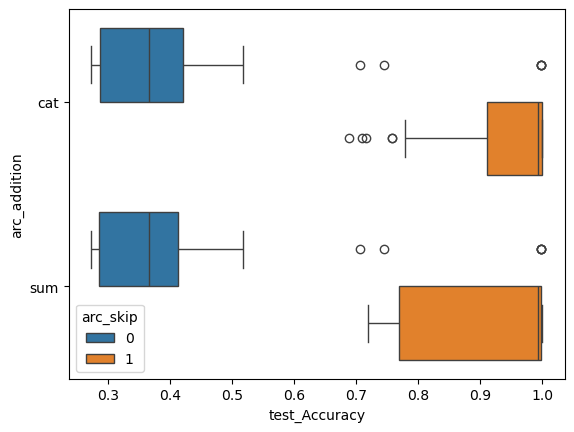

In [25]:
import plotly.express as px
import pandas as pd

from plotly.subplots import make_subplots
import plotly.graph_objects as go


hue = "arc_latent_volume"
xplot = "arc_encoder_blocks"
yplot = "test_Accuracy"

extra_info = [
    "arc_num_params",
    "arc_features",
    "arc_encoder_blocks",
    "arc_latent_volume",
    "arc_skip",
]

sns.boxplot(df, x = 'test_Accuracy',y='arc_addition', hue='arc_skip')

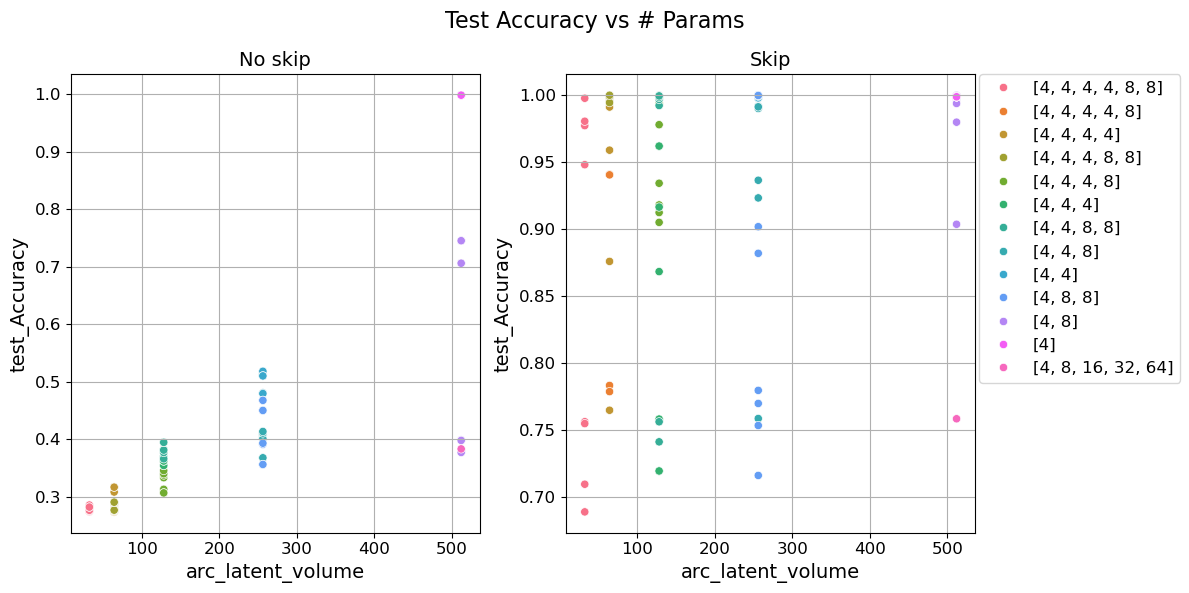

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

xplot = "arc_latent_volume"
yplot = "test_Accuracy"
# hue = "arc_latent_volume"
# size = "arc_num_conv"
size = None
hue = "arc_features"
style = None
extra_info = [
    "test_file",
    "arc_num_params",
    "arc_features",
    "arc_encoder_blocks",
    "arc_latent_volume", 
    "arc_skip",
]

df0 = df.query("arc_skip == 0")
df1 = df.query("arc_skip == 1")

sns.scatterplot(
    data=df0, x=xplot, y=yplot, hue=hue, style=style, ax=ax[0], size=size, legend=False
)
sns.scatterplot(data=df1, x=xplot, y=yplot, hue=hue, style=style, size=size, ax=ax[1])

for a in ax:
    a.grid()
    a.set_xlabel(a.get_xlabel(), fontsize=14)
    a.set_ylabel(a.get_ylabel(), fontsize=14)
    a.tick_params(axis="both", which="major", labelsize=12)

ax[1].legend(
    bbox_to_anchor=(1.01, 1),
    loc=2,
    borderaxespad=0.0,
    fontsize=12,
    title_fontsize=14,
)
fig.suptitle("Test Accuracy vs # Params", fontsize=16)
ax[0].set_title("No skip", fontsize=14)
ax[1].set_title("Skip", fontsize=14)

fig.tight_layout()
plt.show()

In [9]:
df.query("arc_latent_volume == 1024.0")

,run_name,arc_features,arc_encoder_blocks,arc_latent_volume,arc_num_params,arc_skip,arc_pool_mode,arc_up_mode,arc_addition,arc_skip.1,...,test_loss,valid_F1,train_F1,test_F1,train_Accuracy,valid_Accuracy,test_Accuracy,train_Accuracy_seq,valid_Accuracy_seq,test_Accuracy_seq


In [ ]:
df.columns

Index(['run_name', 'train_file', 'arc_features', 'arc_num_params',
       'arc_latent_volume', 'arc_skip', 'train_loss', 'valid_loss',
       'test_loss', 'valid_F1', 'train_F1', 'test_F1', 'train_Accuracy',
       'valid_Accuracy', 'test_Accuracy', 'train_Accuracy_seq',
       'valid_Accuracy_seq', 'test_Accuracy_seq'],
      dtype='object')

/tmp/ipykernel_2783061/848854718.py:34: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



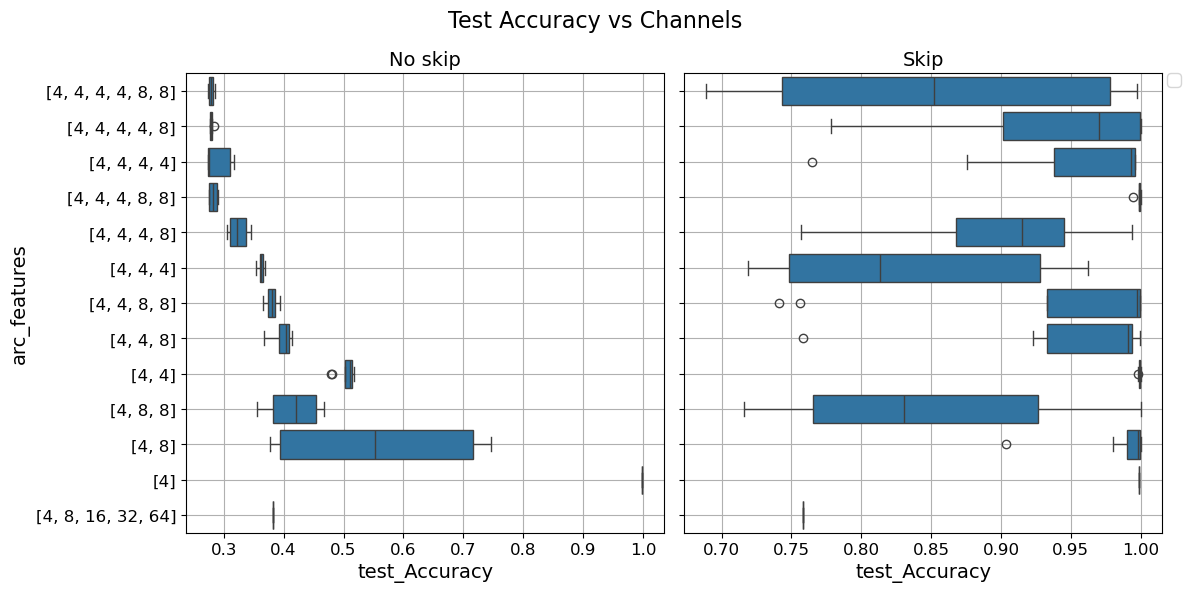

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

yplot = "arc_features"
xplot = "test_Accuracy"
# hue = "arc_latent_volume"
# size = "arc_num_conv"
size = None
hue = None
style = None
extra_info = [
    "test_file",
    "arc_num_params",
    "arc_features",
    "arc_encoder_blocks",
    "arc_latent_volume", 
    "arc_skip",
]

df0 = df.query("arc_skip == 0")
df1 = df.query("arc_skip == 1")

sns.boxplot(data=df0, x=xplot, y=yplot, hue=hue, ax=ax[0], legend=False)
sns.boxplot(data=df1, x=xplot, y=yplot, hue=hue, ax=ax[1])

for a in ax:
    a.grid()
    a.set_xlabel(a.get_xlabel(), fontsize=14)
    a.set_ylabel(a.get_ylabel(), fontsize=14)
    a.tick_params(axis="both", which="major", labelsize=12)

ax[1].legend(
    bbox_to_anchor=(1.01, 1),
    loc=2,
    borderaxespad=0.0,
    fontsize=12,
    title_fontsize=14,
)
fig.suptitle("Test Accuracy vs Channels", fontsize=16)
ax[0].set_title("No skip", fontsize=14)
ax[1].set_title("Skip", fontsize=14)

fig.tight_layout()
plt.show()

/tmp/ipykernel_2783061/3568832521.py:38: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipykernel_2783061/3568832521.py:38: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



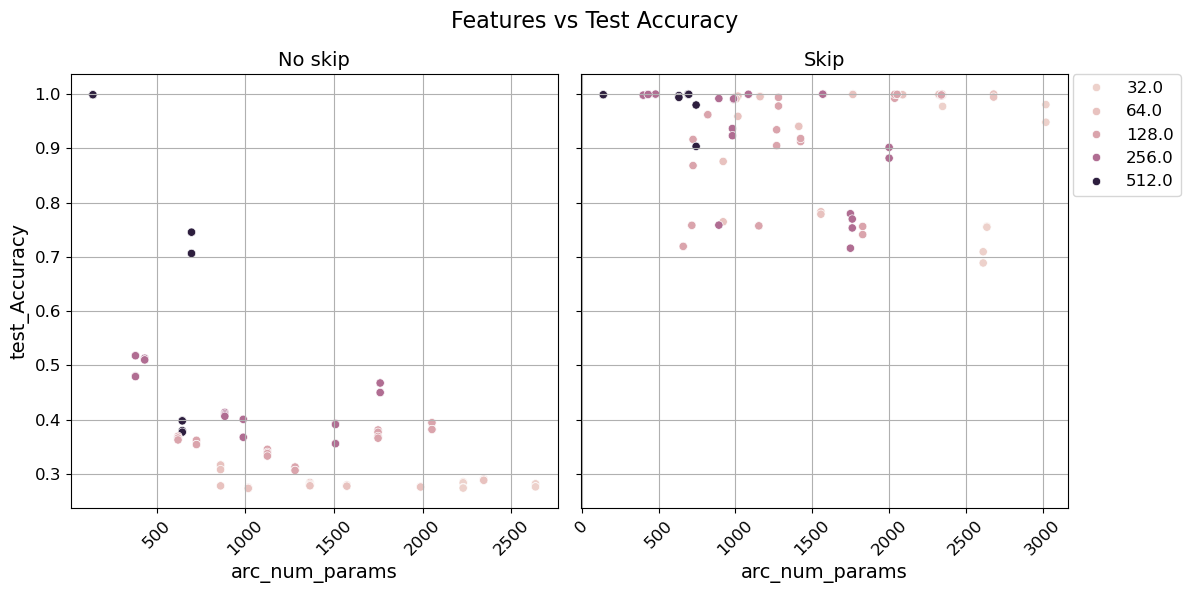

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

xplot = "arc_num_params"
yplot = "test_Accuracy"
hue = "arc_latent_volume"
extra_info = [
    "test_file",
    "arc_num_params",
    "arc_features",
    "arc_encoder_blocks",
    "arc_latent_volume",
    "arc_num_conv",
    "arc_skip",
]

df0 = df.query("arc_skip == 0 and arc_num_params < 30000")
df1 = df.query("arc_skip == 1 and arc_num_params < 30000")

sns.scatterplot(
    data=df0.sort_values(by="test_Accuracy", ascending=False),
    x=xplot,
    y=yplot,
    hue=hue,
    ax=ax[0],
    legend=False,
)
sns.scatterplot(data=df1, x=xplot, y=yplot, hue=hue, ax=ax[1])

for a in ax:
    a.grid()
    a.set_xlabel(a.get_xlabel(), fontsize=14)
    a.set_ylabel(a.get_ylabel(), fontsize=14)
    a.tick_params(axis="both", which="major", labelsize=12)
    a.set_xticklabels(a.get_xticklabels(), rotation=45)

ax[1].legend(
    bbox_to_anchor=(1.01, 1),
    loc=2,
    borderaxespad=0.0,
    fontsize=12,
    title_fontsize=14,
)
fig.suptitle("Features vs Test Accuracy", fontsize=16)
ax[0].set_title("No skip", fontsize=14)
ax[1].set_title("Skip", fontsize=14)

fig.tight_layout()
plt.show()

/tmp/ipykernel_2783061/3437632385.py:36: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipykernel_2783061/3437632385.py:36: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipykernel_2783061/3437632385.py:38: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



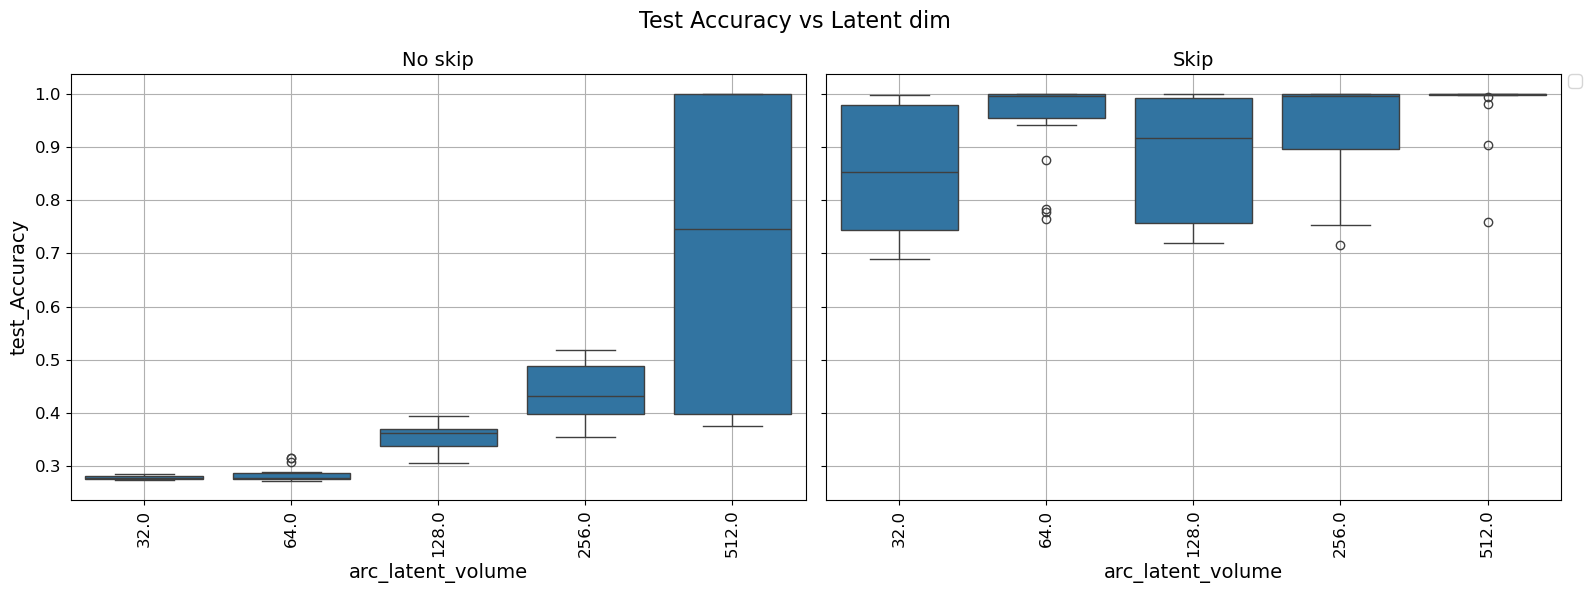

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

xplot = "arc_latent_volume"
yplot = "test_Accuracy"
hue = None
extra_info = [
    "test_file",
    "arc_num_params",
    "arc_features",
    "arc_encoder_blocks",
    "arc_latent_volume",
    "arc_skip",
]

df0 = df.query("arc_skip == 0")
df1 = df.query("arc_skip == 1")

sns.boxplot(
    data=df0.sort_values(by="test_Accuracy"),
    x=xplot,
    y=yplot,
    hue=hue,
    ax=ax[0],
    legend=False,
)
sns.boxplot(data=df1, x=xplot, y=yplot, hue=hue, ax=ax[1])

for a in ax:
    a.grid()
    a.set_xlabel(a.get_xlabel(), fontsize=14)
    a.set_ylabel(a.get_ylabel(), fontsize=14)
    a.tick_params(axis="both", which="major", labelsize=12)
    a.set_xticklabels(a.get_xticklabels(), rotation=90)

ax[1].legend(
    bbox_to_anchor=(1.01, 1),
    loc=2,
    borderaxespad=0.0,
    fontsize=12,
    title_fontsize=14,
)
fig.suptitle("Test Accuracy vs Latent dim", fontsize=16)
ax[0].set_title("No skip", fontsize=14)
ax[1].set_title("Skip", fontsize=14)

fig.tight_layout()
plt.show()